<a href="https://colab.research.google.com/github/shettyarjun/placement_prediction/blob/main/pp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.decomposition import PCA

from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/grand_place (3).csv')

In [ ]:
# Getting to know the shape of data
dataframe.shape

In [ ]:
# Showing the first 5 rows of the dataset
dataframe.head()

In [ ]:
# # prompt: Using dataframe dataframe:

# # Create a scatter plot with the following specifications:
# # - X-axis: High school marks
# # - Y-axis: College marks
# # - Color-coded by Branch
# # - Size of the points determined by Backlogs

# import altair as alt

# chart = alt.Chart(dataframe).mark_circle().encode(
#     x = alt.X("High school marks"),
#     y = alt.Y("College marks"),
#     color = alt.Color("Branch"),
#     size = alt.Size("Backlogs")
# ).interactive()

# chart


In [ ]:
dataframe.sample(4)

In [ ]:
dataframe.dtypes

In [ ]:
# Getting to know the detailed information of the columns
dataframe.info()

In [ ]:
# Statistical Descriptions of the numerical values in the dataset
dataframe.describe()

In [ ]:
# Getting to know the correlation between the target column and other features.
dataframe.corr()['placement_chance']

In [ ]:
# missing values
dataframe.isnull().sum()

In [ ]:
# duplicate rows
print(dataframe.duplicated().sum())

#drop duplicates
dataframe.drop_duplicates(inplace=True)

In [ ]:
# Check if the duplicate rows are removed
print(dataframe.duplicated().sum())

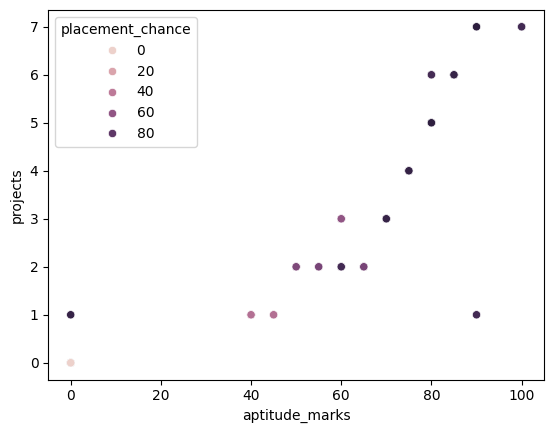

In [ ]:
# prompt: plot graph with aptitude  marks as x and project as y and color as placement chances

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=dataframe,
    x="aptitude_marks",
    y="projects",
    hue="placement_chance",
)
plt.show()


In [ ]:
# Filter for placed students
placed_data = dataframe[dataframe['placement_chance'] > 0]

# Get the number of Projects for placed students
Projects_placed = placed_data['projects']

# Find the highest and lowest number of Projects
max_Projects = Projects_placed.max()
min_Projects = Projects_placed.min()

# Print the highest and lowest number of Projects
print("Highest number of Projects among placed students:", max_Projects)
print("Lowest number of Projects among placed students:", min_Projects)


Highest number of Projects among placed students: 7
Lowest number of Projects among placed students: 0


In [ ]:
# Printing the Maximum and Minimum number of internships done by the student who is placed.
max_internships_placed = placed_data['internship'].max()
min_internships_placed = placed_data['internship'].min()

print("Max internship Done by the Placed Student:", max_internships_placed)
print("Min internship Done by the Placed Person:", min_internships_placed)

# Printing the Maximum and Minimum number of students who did the max internship and the minimum number of internships.
max_internship_count = placed_data['internship'].value_counts().max()
min_internship_count = placed_data['internship'].value_counts().min()

print("No of students who did max internship and are placed:", max_internship_count)
print("No of students who did min internship and are placed:", min_internship_count)


Max internship Done by the Placed Student: 5
Min internship Done by the Placed Person: 0
No of students who did max internship and are placed: 14
No of students who did min internship and are placed: 3


In [ ]:
# Printing the Maximum and Minimum number of aptitude_marks obtained by the student who is placed.
max_aptitude_marks_placed = placed_data['aptitude_marks'].max()
min_aptitude_marks_placed = placed_data['aptitude_marks'].min()

print("Max aptitude_marks of Placed Student:", max_aptitude_marks_placed)
print("Min aptitude_marks of Placed Student:", min_aptitude_marks_placed)

# Printing the Maximum and Minimum number of students who got the max aptitude_marks and the minimum aptitude_marks who are placed.
max_aptitude_marks_count = placed_data[placed_data['aptitude_marks'] == max_aptitude_marks_placed].shape[0]
min_aptitude_marks_count = placed_data[placed_data['aptitude_marks'] == min_aptitude_marks_placed].shape[0]

print("No of students with max aptitude_marks and are placed:", max_aptitude_marks_count)
print("No of students with min aptitude_marks and are placed:", min_aptitude_marks_count)


Max aptitude_marks of Placed Student: 100
Min aptitude_marks of Placed Student: 0
No of students with max aptitude_marks and are placed: 2
No of students with min aptitude_marks and are placed: 2


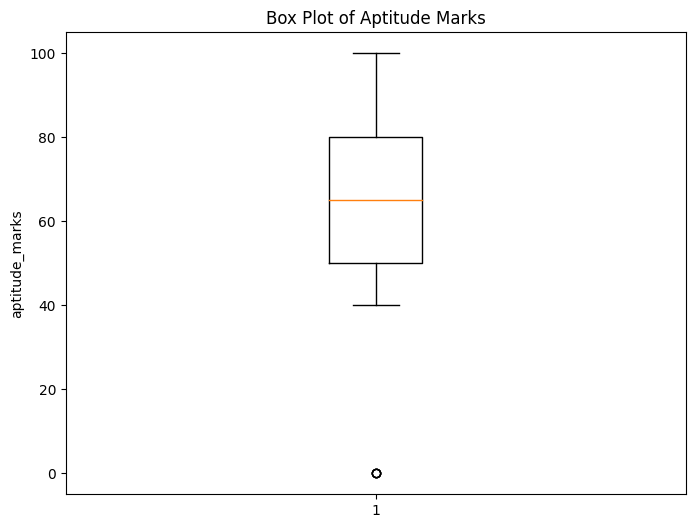

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'dataframe' is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(dataframe['aptitude_marks'])
plt.ylabel('aptitude_marks')
plt.title('Box Plot of Aptitude Marks')
plt.show()


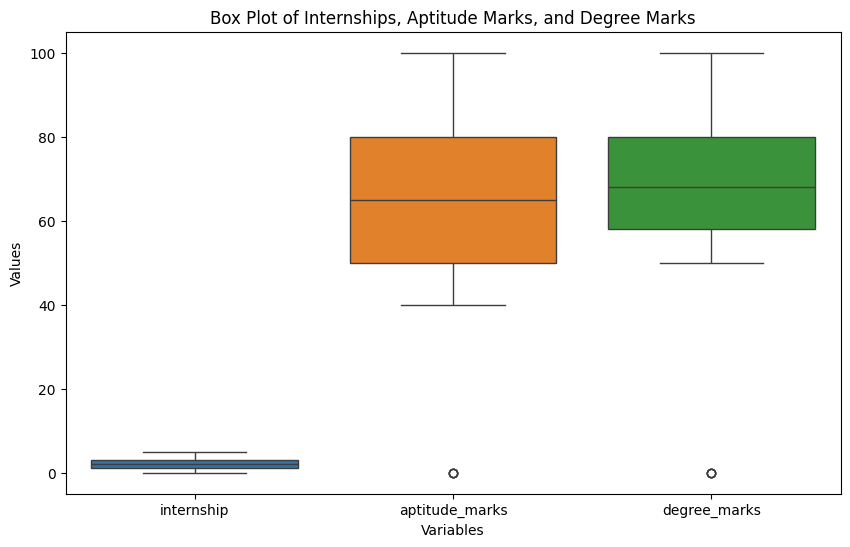

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataframe' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe[['internship', 'aptitude_marks', 'degree_marks']])
plt.title('Box Plot of Internships, Aptitude Marks, and Degree Marks')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()


In [ ]:
X = dataframe.iloc[:,0:7]
y = dataframe.iloc[:,-1]
X


,aptitude_marks,10th_marks,12th_marks,degree_marks,internship,projects,backlogs
0,60,65,60,62,1,2,4
1,75,80,78,75,3,4,1
2,55,70,68,60,0,2,3
3,80,85,82,80,4,6,1
4,65,68,70,68,1,2,3
5,85,85,88,87,4,6,0
6,40,55,55,58,0,1,5
7,60,62,65,62,2,3,3
8,75,78,78,78,3,4,1
9,50,58,60,58,1,2,4


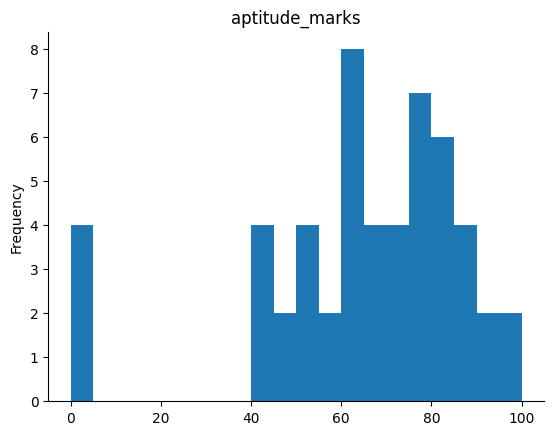

In [ ]:
# @title aptitude_marks

from matplotlib import pyplot as plt
X['aptitude_marks'].plot(kind='hist', bins=20, title='aptitude_marks')
plt.gca().spines[['top', 'right',]].set_visible(False)

load the trained model,without training again


In [ ]:
import os
import joblib

# Get the absolute path of the current directory
current_directory = os.getcwd()

# Specify the absolute paths of the files
model_path = "/content/drive/MyDrive/random_forest_model.pk2"
scaler_path = "/content/drive/MyDrive/scaler.pk2"

# Load the trained Random Forest model
best_rf_model = joblib.load(model_path)

# Load the scaler for feature scaling
scaler = joblib.load(scaler_path)


In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error

# # Load dataset
# dataset = np.genfromtxt("/content/drive/MyDrive/grand_place (3).csv", delimiter=",", skip_header=True)

# # Split dataset into features and target
# X = dataset[:, :-1]  # Features
# y = dataset[:, -1]   # Target

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define Random Forest regressor
# rf_regressor = RandomForestRegressor(random_state=42)

# # Define hyperparameters to tune
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train_scaled, y_train)

# # Get best Random Forest model
# best_rf_model = grid_search.best_estimator_

# # Evaluate model using cross-validation
# cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
# cv_mse = -cv_scores.mean()
# print("Cross-validated Mean Squared Error:", cv_mse)

# # Make predictions
# y_pred = best_rf_model.predict(X_test_scaled)

# # Calculate Mean Squared Error
# mse = mean_squared_error(y_test, y_pred)
# print("Random Forest Mean Squared Error:", mse)

# # Get feature importance
# feature_importance = best_rf_model.feature_importances_
# sorted_indices = np.argsort(feature_importance)[::-1]
# print("Feature Importance:")
# for i in sorted_indices:
#     print(f"Feature {i+1}: {feature_importance[i]}")


Cross-validated Mean Squared Error: 74.88698690854909
Random Forest Mean Squared Error: 7.925464732374761
Feature Importance:
Feature 8: 0.7169378338702816
Feature 7: 0.06777812025447272
Feature 1: 0.04927481520551512
Feature 2: 0.04731002354739633
Feature 3: 0.04429675118108199
Feature 4: 0.03373671976230168
Feature 6: 0.023074906434434304
Feature 5: 0.017590829744516374


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# import joblib

# # Assuming you have trained your Random Forest model and scaler
# # best_rf_model = RandomForestRegressor(n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
# # scaler = StandardScaler()
# # Train your model and scaler here

# # Save the trained Random Forest model
# joblib.dump(best_rf_model, "random_forest_model.pk2")

# # Save the scaler for feature scaling
# joblib.dump(scaler, "scaler.pk2")


['scaler.pk2']

In [ ]:
# import os

# # Get the current working directory
# current_directory = os.getcwd()

# # List all files in the current directory
# files_in_directory = os.listdir(current_directory)

# # Filter out the files with .pkl extension
# saved_model_files = [file for file in files_in_directory if file.endswith(".pkl")]
# #
# # Print the paths of the saved model files
# for file in saved_model_files:
#     print(os.path.join(current_directory, file))


In [ ]:
import numpy as np
import joblib


# Function to predict placement chance
def predict_placement_chance(aptitude_marks, tenth_marks, twelfth_marks, degree_marks,
                             internship, projects, backlogs, leetcode):
    # Check if candidate is disqualified
    if (aptitude_marks < 50 or tenth_marks < 50 or twelfth_marks < 50 or degree_marks < 70):
        return 0  # Candidate cannot be placed

    # Scale the input features
    input_features = np.array([[aptitude_marks, tenth_marks, twelfth_marks, degree_marks,
                                 internship, projects, backlogs, leetcode]])
    input_features_scaled = scaler.transform(input_features)

    # Make prediction
    placement_chance = best_rf_model.predict(input_features_scaled)[0]

    # Convert placement chance to percentage
    placement_chance_percentage = max(0, min(100, placement_chance))

    return placement_chance_percentage

# Function to get user input and predict placement chance
def predict_placement_chance_from_user_input():
    # Get user input for different features
    aptitude_marks = float(input("Enter aptitude marks (0-100): "))
    tenth_marks = float(input("Enter 10th marks (0-100): "))
    twelfth_marks = float(input("Enter 12th marks (0-100): "))
    degree_marks = float(input("Enter degree marks (0-100): "))
    internship = float(input("Enter internship (0-5): "))
    projects = float(input("Enter projects (0-7): "))
    backlogs = float(input("Enter backlogs (0-5): "))
    leetcode = float(input("Enter LeetCode questions (0-550): "))

    # Predict placement chance
    placement_chance_percentage = predict_placement_chance(aptitude_marks, tenth_marks, twelfth_marks, degree_marks,
                                                             internship, projects, backlogs, leetcode)

    if placement_chance_percentage == 0:
        print("Candidate cannot be placed based on qualification criteria.")
    else:
        print(f"\nPredicted Placement Chance: {placement_chance_percentage:.2f}%")

# Main function
if __name__ == "__main__":
    # Get user input and predict placement chance
    predict_placement_chance_from_user_input()
